<a href="https://colab.research.google.com/github/pranavibannela/Stock-Movement-Analysis/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install praw
!pip install textblob
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


In [36]:
import praw
import pandas as pd

# Initialize Reddit API
reddit = praw.Reddit(
    client_id="gj_fksZpsYQNYMMTHjGYVg",
    client_secret="1uVLZPS3dzV_-d1d-5lcZWp4oy10ZQ",
    user_agent="stockmovementanalysis v1.0 by /u/Appropriate-Fox3670"
)

# List of subreddits you want to scrape
subreddits = [
    'stocks', 'investing', 'wallstreetbets', 'finance', 'financialindependence',
    'pennystocks', 'options', 'cryptocurrency', 'stockmarket', 'bogleheads',
    'forex', 'investmentclub', 'Daytrading', 'RealEstate', 'ValueInvesting'
]

# Scrape posts from multiple subreddits
posts = []
target_post_count = 4000  # Target number of posts

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)  # Get subreddit by name

    # Scrape posts from different sorting methods: 'hot', 'new', 'top', 'rising'
    for sort_method in ['hot', 'new', 'top', 'rising']:  # Adding multiple sorting methods
        for submission in getattr(subreddit, sort_method)(limit=100):  # Scraping 100 posts at a time
            post = {
                'subreddit': subreddit_name,  # Add subreddit name to each post
                'title': submission.title,
                'selftext': submission.selftext,
                'score': submission.score,
                'comments': submission.num_comments,
                'url': submission.url,
            }
            posts.append(post)

            # Stop if we've scraped enough posts
            if len(posts) >= target_post_count:
                break
        if len(posts) >= target_post_count:
            break
    if len(posts) >= target_post_count:
        break

# Convert posts to DataFrame
df = pd.DataFrame(posts)

# Show the first few rows of the data
print(df.head())

# Check the number of entries in the DataFrame
print(f'Total number of posts scraped: {len(df)}')

# Optional: Clean the DataFrame by removing duplicates or posts with empty titles
df = df.drop_duplicates(subset=['title', 'url'])
df = df[df['title'] != '']

# Show cleaned data
print(df.head())


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

  subreddit                                              title  \
0    stocks  Rate My Portfolio - r/Stocks Quarterly Thread ...   
1    stocks  r/Stocks Daily Discussion Wednesday - Dec 04, ...   
2    stocks  Nintendo stock have seen a big increase this p...   
3    stocks  Name a large-cap stock and its small-cap compe...   
4    stocks  Tesla CEO Elon Musk loses bid to get $56 billi...   

                                            selftext  score  comments  \
0  Please use this thread to discuss your portfol...     11       106   
1  These daily discussions run from Monday to Fri...      3         0   
2  Something interesting is happening behind the ...     15         6   
3  I am always looking for small/mid-cap companie...     77        48   
4  A Delaware judge ruled on Monday that Tesla, C...   5254       792   

                                                 url  
0  https://www.reddit.com/r/stocks/comments/1h403...  
1  https://www.reddit.com/r/stocks/comments/1h6d0...  

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2610 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  2610 non-null   object
 1   title      2610 non-null   object
 2   selftext   2610 non-null   object
 3   score      2610 non-null   int64 
 4   comments   2610 non-null   int64 
 5   url        2610 non-null   object
dtypes: int64(2), object(4)
memory usage: 142.7+ KB


In [38]:
df.to_csv('reddit_stock_data.csv', index=False, escapechar='\\')


In [39]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
print(df.columns)


Index(['subreddit', 'title', 'selftext', 'score', 'comments', 'url'], dtype='object')


In [41]:
# Force-remove existing nltk_data and redownload
import nltk
import shutil
import os

# Path to nltk_data
nltk_data_path = os.path.expanduser('~/nltk_data')
if os.path.exists(nltk_data_path):
    shutil.rmtree(nltk_data_path)

# Re-download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
!pip install spacy


In [43]:
import spacy

# Load SpaCy tokenizer
nlp = spacy.blank("en")  # Minimal English tokenizer
test_text = "This is a test sentence."
tokens = [token.text for token in nlp(test_text)]
print(tokens)  # Output: ['This', 'is', 'a', 'test', 'sentence', '.']


['This', 'is', 'a', 'test', 'sentence', '.']


In [44]:
#!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [45]:
import spacy

# Load SpaCy's small English model
nlp = spacy.load('en_core_web_sm')

# Preprocessing using SpaCy
def preprocess_spacy(text):
    if not isinstance(text, str):  # Handle missing or non-string data
        return ""
    doc = nlp(text.lower())
    cleaned_tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(cleaned_tokens)

# Apply the SpaCy preprocessing function
df['cleaned_title'] = df['title'].apply(preprocess_spacy)

# Verify results
print(df[['title', 'cleaned_title']].head())


                                               title  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...   
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...   
2  Nintendo stock have seen a big increase this p...   
3  Name a large-cap stock and its small-cap compe...   
4  Tesla CEO Elon Musk loses bid to get $56 billi...   

                                       cleaned_title  
0   rate portfolio r stock quarterly thread december  
1             r stock daily discussion wednesday dec  
2         nintendo stock see big increase past month  
3               large cap stock small cap competitor  
4  tesla ceo elon musk lose bid billion pay packa...  


In [46]:
# Strip extra spaces from the cleaned titles
df['cleaned_title'] = df['cleaned_title'].apply(lambda x: " ".join(x.split()))
print(df[['title', 'cleaned_title']].head())


                                               title  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...   
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...   
2  Nintendo stock have seen a big increase this p...   
3  Name a large-cap stock and its small-cap compe...   
4  Tesla CEO Elon Musk loses bid to get $56 billi...   

                                       cleaned_title  
0   rate portfolio r stock quarterly thread december  
1             r stock daily discussion wednesday dec  
2         nintendo stock see big increase past month  
3               large cap stock small cap competitor  
4  tesla ceo elon musk lose bid billion pay packa...  


In [47]:
# Remove duplicate rows based on the title or any other feature
df = df.drop_duplicates(subset=['title'])


In [48]:
df = df.dropna(subset=['title', 'selftext'])  # Drop rows with missing 'title' or 'selftext'


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2591 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subreddit      2591 non-null   object
 1   title          2591 non-null   object
 2   selftext       2591 non-null   object
 3   score          2591 non-null   int64 
 4   comments       2591 non-null   int64 
 5   url            2591 non-null   object
 6   cleaned_title  2591 non-null   object
dtypes: int64(2), object(5)
memory usage: 161.9+ KB


In [50]:
print(df['cleaned_title'].head())


0     rate portfolio r stock quarterly thread december
1               r stock daily discussion wednesday dec
2           nintendo stock see big increase past month
3                 large cap stock small cap competitor
4    tesla ceo elon musk lose bid billion pay packa...
Name: cleaned_title, dtype: object


In [54]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))  # Increase max_features


In [55]:
df = df[df['cleaned_title'].str.strip().ne('')]  # Remove empty rows


In [57]:
print(df['cleaned_title'].head(10))


0     rate portfolio r stock quarterly thread december
1               r stock daily discussion wednesday dec
2           nintendo stock see big increase past month
3                 large cap stock small cap competitor
4    tesla ceo elon musk lose bid billion pay packa...
5    salesforce share rise earning beat revenue fou...
6    palantir grant fedramp high baseline authoriza...
7                                    ko worth dividend
8                                   marvell beat raise
9    rivian potential billion doe loan catch eye mu...
Name: cleaned_title, dtype: object


In [59]:
from sklearn.cluster import KMeans


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Test with a custom tokenizer (e.g., removing punctuation)
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Bigrams
    stop_words='english',  # Remove common stopwords
)

X = tfidf_vectorizer.fit_transform(df['cleaned_title'])
X_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(X_df.head())


   aapl  able  absolute  absolute bad  absolute good  accept  accept bitcoin  \
0   0.0   0.0       0.0           0.0            0.0     0.0             0.0   
1   0.0   0.0       0.0           0.0            0.0     0.0             0.0   
2   0.0   0.0       0.0           0.0            0.0     0.0             0.0   
3   0.0   0.0       0.0           0.0            0.0     0.0             0.0   
4   0.0   0.0       0.0           0.0            0.0     0.0             0.0   

   access  accidentally  accord  ...  young  young people  youtube  youtuber  \
0     0.0           0.0     0.0  ...    0.0           0.0      0.0       0.0   
1     0.0           0.0     0.0  ...    0.0           0.0      0.0       0.0   
2     0.0           0.0     0.0  ...    0.0           0.0      0.0       0.0   
3     0.0           0.0     0.0  ...    0.0           0.0      0.0       0.0   
4     0.0           0.0     0.0  ...    0.0           0.0      0.0       0.0   

   yuan  zero  zeta  zillow  zone  zoo

In [63]:
print(f"TF-IDF Shape: {X.shape}")  # Check dimensions
print(f"Non-zero values: {X.nnz}")  # Number of non-zero values


TF-IDF Shape: (2579, 5000)
Non-zero values: 17685


In [62]:
# Experiment with more clusters
num_clusters = 5  # Try different numbers like 5, 10, etc.
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign the cluster labels to your DataFrame
df['cluster'] = kmeans.labels_

# Inspect the resulting clusters
print(df[['title', 'cluster']].head())


                                               title  cluster
0  Rate My Portfolio - r/Stocks Quarterly Thread ...        2
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...        2
2  Nintendo stock have seen a big increase this p...        0
3  Name a large-cap stock and its small-cap compe...        2
4  Tesla CEO Elon Musk loses bid to get $56 billi...        2


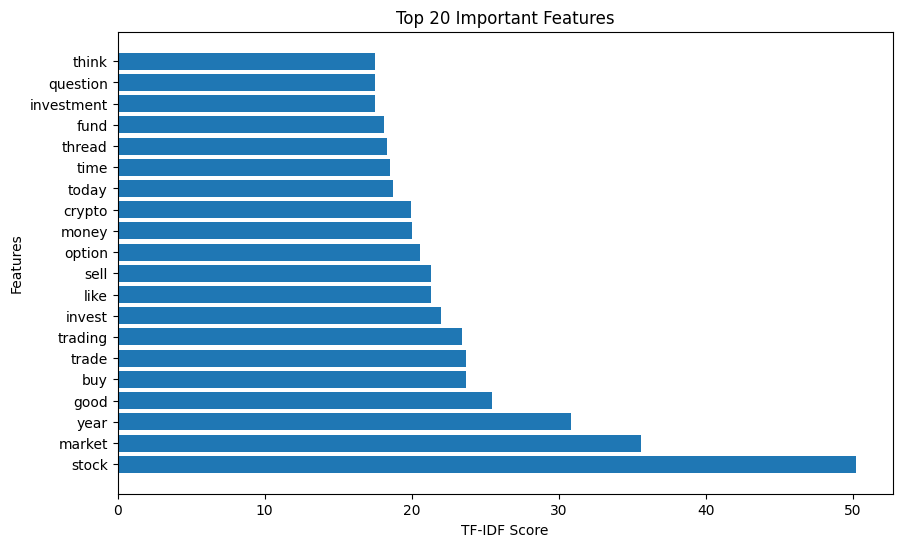

In [64]:
import matplotlib.pyplot as plt

# Get feature names and their corresponding tf-idf scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X_df.sum(axis=0).sort_values(ascending=False)

# Plot top 20 important features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(tfidf_scores.head(top_n).index, tfidf_scores.head(top_n).values)
plt.xlabel('TF-IDF Score')
plt.ylabel('Features')
plt.title('Top 20 Important Features')
plt.show()


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2579 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subreddit      2579 non-null   object
 1   title          2579 non-null   object
 2   selftext       2579 non-null   object
 3   score          2579 non-null   int64 
 4   comments       2579 non-null   int64 
 5   url            2579 non-null   object
 6   cleaned_title  2579 non-null   object
 7   cluster        2579 non-null   int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 171.3+ KB


In [66]:
print(len(df))  # Check the number of rows in your DataFrame
print(len(kmeans.labels_))  # Check the number of labels generated by KMeans


2579
2579


In [67]:
# Ensure no missing values in the 'cleaned_title' column before fitting
df_cleaned = df.dropna(subset=['cleaned_title'])

# Then proceed with TF-IDF and KMeans clustering
X = tfidf_vectorizer.fit_transform(df_cleaned['cleaned_title'])
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels back to the cleaned DataFrame
df_cleaned['cluster'] = kmeans.labels_
print(df_cleaned[['title', 'cluster']].head())


                                               title  cluster
0  Rate My Portfolio - r/Stocks Quarterly Thread ...        2
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...        2
2  Nintendo stock have seen a big increase this p...        0
3  Name a large-cap stock and its small-cap compe...        2
4  Tesla CEO Elon Musk loses bid to get $56 billi...        2


###Through Logistic Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use the 'cluster' column as the label
X = tfidf_vectorizer.fit_transform(df['cleaned_title'])
y = df['cluster']  # Using the 'cluster' column as the target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 86.95%


In [69]:
print(df.columns)


Index(['subreddit', 'title', 'selftext', 'score', 'comments', 'url',
       'cleaned_title', 'cluster'],
      dtype='object')


###Through Random Forest,SVM and Naive Baiyes

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer with adjustments
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3), max_df=0.95, min_df=5)
X = tfidf_vectorizer.fit_transform(df['cleaned_title'])
y = df['cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
nb_model = MultinomialNB()
xgb_model = XGBClassifier(random_state=42)

# Train and predict with each model
models = {'Random Forest': rf_model, 'SVM': svm_model, 'Naive Bayes': nb_model, 'XGBoost': xgb_model}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")




Training Random Forest...
Random Forest Accuracy: 97.93%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      0.91      0.93        34
           2       1.00      0.99      0.99       590
           3       0.92      0.90      0.91        39
           4       0.91      0.98      0.94       104

    accuracy                           0.98       774
   macro avg       0.95      0.93      0.94       774
weighted avg       0.98      0.98      0.98       774


Training SVM...
SVM Accuracy: 98.58%
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      0.94      0.94        34
           2       0.99      1.00      0.99       590
           3       1.00      0.90      0.95        39
           4       0.99      0.99      0.99       104

    accuracy             

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.18      0.30        34
           2       0.83      1.00      0.91       590
           3       1.00      0.15      0.27        39
           4       0.92      0.45      0.61       104

    accuracy                           0.84       774
   macro avg       0.75      0.36      0.42       774
weighted avg       0.85      0.84      0.80       774


Training XGBoost...
XGBoost Accuracy: 98.06%
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.92      0.97      0.94        34
           2       1.00      0.99      0.99       590
           3       0.95      0.92      0.94        39
           4       0.92      0.98      0.95       104

    accuracy                           0.98       774
   macro avg       

By this we can say that SVM model acheives 98% accuracy.